<a href="https://colab.research.google.com/github/ValanJeba/ML_Project/blob/main/Jeba_Valan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  **Atmospheric Data Scientist – Predictive Analytics & Weather Trend Modeling**
---

##  Domain :  
**Environment & Climate Analytics**

##  Problem Statement :
Accurate short-term weather forecasting is essential for informed decision-making in agriculture, transportation, disaster management, and energy sectors. Traditional models are often resource-heavy; hence, this project explores a machine learning-based solution for efficient, data-driven weather prediction.

##  Objectives :

1.  Collect and preprocess historical weather data for a specific location.
2.  Build regression/time series models to predict key weather variables:
   -  Temperature  
   -  Humidity  
   -  Rainfall (or rain occurrence)
3.  Evaluate the model’s performance and visualize the predictions.

##  Expected Outcomes :

-  A trained ML model capable of forecasting weather up to 3–7 days ahead.
-  Visualizations comparing actual vs. predicted values.
-  Feature-rich dataset with engineered variables (e.g., lag features, rolling averages).
-  An interactive dashboard (using Streamlit or Dash) for live predictions.

##  Brainstorming Directions :

-  **Feature Engineering**  
  Add rolling averages, lags, time-based encoding, etc.

-  **Visualization Enhancements**  
  Use line charts, anomaly detection plots, and interactive tools for insights.

##  Target :

- Precipitation forecasting [var : Precip Type] [Classification].

## Feature description :
  1. Formatted Date -->  The date and time when the weather data was recorded.
  2. Summary --> A brief textual description of the weather conditions at the time.
  3. Precip Type --> The type of precipitation (e.g., rain, snow) occurring at the time.
  4. Temperature (C) --> The ambient temperature in Celsius (°C) at the recorded time.
  5. Apparent Temperature (C) --> The "feels like" temperature, considering wind and humidity, in Celsius (°C).
  6. Humidity --> The relative humidity of the air, expressed as a percentage.
  7. Wind Speed (km/h) --> The speed of the wind in kilometers per hour (km/h).
  8. Wind Bearing (degrees) --> The direction from which the wind is coming, in degrees (0° to 360°).
  9. Visibility (km) --> The distance objects can be seen, measured in kilometers (km).
  10. Cloud Cover --> The percentage of the sky covered by clouds at the recorded time.
  11. Pressure (millibars) --> The atmospheric pressure at the recorded time, in millibars (mb).
  12. Daily Summary --> A textual summary of the weather conditions for the entire day.

---

##  Dataset source :
- **Title** : Daily Weather Data.
- **Source from** : Kaggle.
- **Source** :
 **[Click here to view/download dataset](https://raw.githubusercontent.com/ValanJeba/ML_Project/49aa8910c0ffb6ab95347fd52536a25691538976/Weather_History.csv)**  
(CSV file with historical weather data: temperature, humidity, wind, etc.)


---


#INITIAL EDA:

##Libraries importing and dataset assuming

In [202]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [203]:
# Load Dataset

df = pd.read_csv('https://raw.githubusercontent.com/ValanJeba/ML_Project/49aa8910c0ffb6ab95347fd52536a25691538976/Weather_History.csv')

In [204]:
# Copy the dataset

dfc = df.copy()

##Basic Column Info

In [205]:
# Total count of missing values

print('Total missing values :',dfc.isnull().sum().sum())

Total missing values : 551


In [206]:
# count null values column wise

dfc.isnull().sum()

,0
Formatted Date,0
Summary,0
Precip Type,518
Temperature (C),10
Apparent Temperature (C),12
Humidity,3
Wind Speed (km/h),1
Wind Bearing (degrees),7
Visibility (km),0
Loud Cover,0


In [207]:
# Dataset information

dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95935 non-null  object 
 3   Temperature (C)           96443 non-null  float64
 4   Apparent Temperature (C)  96441 non-null  float64
 5   Humidity                  96450 non-null  float64
 6   Wind Speed (km/h)         96452 non-null  float64
 7   Wind Bearing (degrees)    96446 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  int64  
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(7), int64(1), object(4)
memory usage: 8.8+ MB


In [208]:
# Describe dataset

dfc.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96443.000000,96441.000000,96450.000000,96452.000000,96446.000000,96453.000000,96453.0,96453.000000
mean,11.933049,10.855605,0.734897,10.810752,187.522624,10.347325,0.0,1003.235956
std,9.551825,10.697190,0.195469,6.913519,107.375814,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [209]:
# First 3 rows

dfc.head(3)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0,1015.94,Partly cloudy throughout the day.


In [210]:
# Last three rows

dfc.tail(3)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0,1015.95,Partly cloudy starting in the morning.
96452,2016-09-09 23:00:00.000 +0200,Partly Cloudy,rain,20.438889,20.438889,0.61,5.8765,39.0,15.5204,0,1016.16,Partly cloudy starting in the morning.


## Column Details

In [211]:
# shape

print('Shape of the Dataset:\n\t',dfc.shape)

Shape of the Dataset:
	 (96453, 12)


In [212]:
# Column names

all_columns = dfc.columns
print('Columns in the Dataset:\n',all_columns)

Columns in the Dataset:
 Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')


In [213]:
# Drop Cloud cover column

dfc.drop('Loud Cover', axis=1, inplace=True)

In [214]:
# Find categorical columns'

cate_col = dfc.select_dtypes(include=['object']).columns.tolist()
print('Categorical Columns:\n',cate_col)
print('\n','-'*65,'\n')

# Find numerical columns

num_col = dfc.select_dtypes(include=['number']).columns.tolist()
print('Numerical Columns:\n',num_col)

Categorical Columns:
 ['Formatted Date', 'Summary', 'Precip Type', 'Daily Summary']

 ----------------------------------------------------------------- 

Numerical Columns:
 ['Temperature (C)', 'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)']


In [215]:
# Unique value in categorical columns

for col in cate_col:
  if col == "Daily Summary":
    continue
  print(f"{col}unique values:\n{dfc[col].unique()}\n")
  print('-'*80)

Formatted Dateunique values:
['2006-04-01 00:00:00.000 +0200' '2006-04-01 01:00:00.000 +0200'
 '2006-04-01 02:00:00.000 +0200' ... '2016-09-09 21:00:00.000 +0200'
 '2016-09-09 22:00:00.000 +0200' '2016-09-09 23:00:00.000 +0200']

--------------------------------------------------------------------------------
Summaryunique values:
['Partly Cloudy' 'Mostly Cloudy' 'Overcast' 'Foggy'
 'Breezy and Mostly Cloudy' 'Clear' 'Breezy and Partly Cloudy'
 'Breezy and Overcast' 'Humid and Mostly Cloudy' 'Humid and Partly Cloudy'
 'Windy and Foggy' 'Windy and Overcast' 'Breezy and Foggy'
 'Windy and Partly Cloudy' 'Breezy' 'Dry and Partly Cloudy'
 'Windy and Mostly Cloudy' 'Dangerously Windy and Partly Cloudy' 'Dry'
 'Windy' 'Humid and Overcast' 'Light Rain' 'Drizzle' 'Windy and Dry'
 'Dry and Mostly Cloudy' 'Breezy and Dry' 'Rain']

--------------------------------------------------------------------------------
Precip Typeunique values:
['rain' 'snow' nan]

---------------------------------------

#**PRE PROCESSING & EDA (VISUALIZATION):**

##Handle Missing Values:

In [216]:
# convert to datetime format
dfc['Formatted Date'] = pd.to_datetime(dfc['Formatted Date'], utc=True)

In [217]:
# count missing values

dfc.isnull().sum()

,0
Formatted Date,0
Summary,0
Precip Type,518
Temperature (C),10
Apparent Temperature (C),12
Humidity,3
Wind Speed (km/h),1
Wind Bearing (degrees),7
Visibility (km),0
Pressure (millibars),0


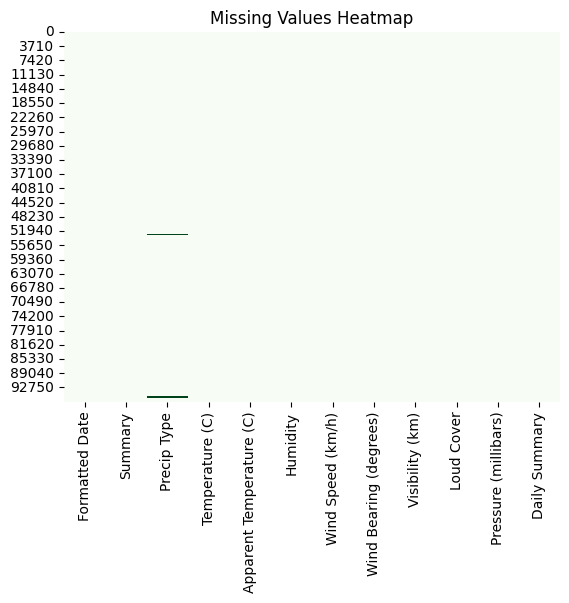

In [218]:
# Missig Values Heatmap

sns.heatmap(df.isnull(), cbar=False, cmap='Greens')
plt.title("Missing Values Heatmap")
plt.show()


In [219]:
# Mode value in Precio type

print(dfc['Precip Type'].mode())

# Fill the missing in categorical columns

dfc['Precip Type'] = dfc['Precip Type'].fillna(dfc['Precip Type'].mode()[0])

0    rain
Name: Precip Type, dtype: object


In [220]:
# Mode value in Wind Speed (km/h)

print(dfc['Wind Speed (km/h)'].mode())

# Fill the missing in numerical columns

dfc['Wind Speed (km/h)'] = dfc['Wind Speed (km/h)'].fillna(dfc['Wind Speed (km/h)'].mode()[0])


0    3.22
Name: Wind Speed (km/h), dtype: float64


In [221]:
# Fill the missing in numerical columns

for col in num_col:
  dfc[col] = dfc[col].fillna(dfc[col].mean())
  print(f"{col} column's missing values filled with mean {dfc[col].mean():.2f}")
  print('-'*71)

Temperature (C) column's missing values filled with mean 11.93
-----------------------------------------------------------------------
Apparent Temperature (C) column's missing values filled with mean 10.86
-----------------------------------------------------------------------
Humidity column's missing values filled with mean 0.73
-----------------------------------------------------------------------
Wind Speed (km/h) column's missing values filled with mean 10.81
-----------------------------------------------------------------------
Wind Bearing (degrees) column's missing values filled with mean 187.52
-----------------------------------------------------------------------
Visibility (km) column's missing values filled with mean 10.35
-----------------------------------------------------------------------
Pressure (millibars) column's missing values filled with mean 1003.24
-----------------------------------------------------------------------


In [222]:
dfc.isnull().sum()

,0
Formatted Date,0
Summary,0
Precip Type,0
Temperature (C),0
Apparent Temperature (C),0
Humidity,0
Wind Speed (km/h),0
Wind Bearing (degrees),0
Visibility (km),0
Pressure (millibars),0


##Handle Duplicates

In [223]:
# Find duplicates
print("Number of duplicate in the dataset is :",dfc.duplicated().sum())


Number of duplicate in the dataset is : 24


In [224]:
# Remove duplicates
dfc.drop_duplicates(inplace = True)

##Handle Outliers

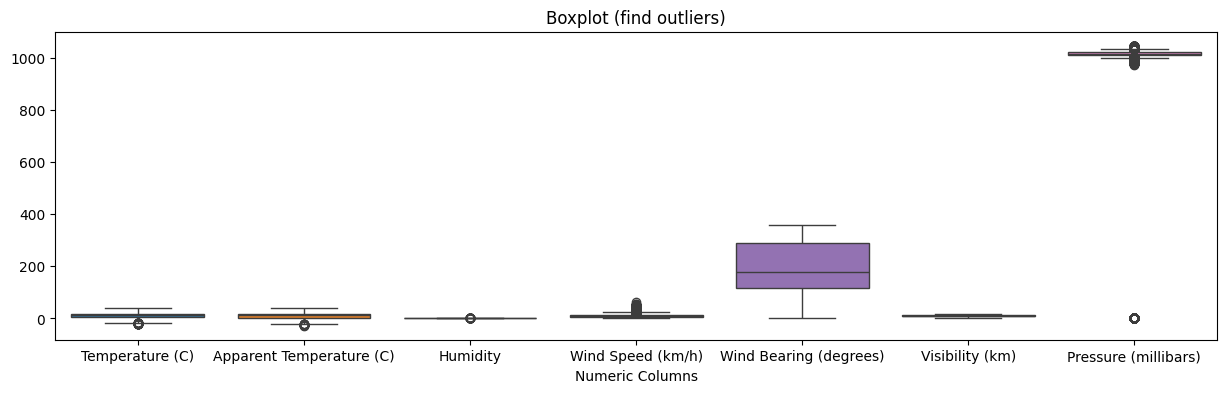

In [225]:
# Find outliers (useing box plot)
plt.figure(figsize=(15,4))
sns.boxplot(data=dfc)
plt.title('Boxplot (find outliers)')
plt.xlabel("Numeric Columns")
plt.show()


In [226]:
# Find 5 number summary
q1 = dfc['Pressure (millibars)'].quantile(0.25)
q3 = dfc['Pressure (millibars)'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

print("Q1:", q1)
print("Q3:", q3)
print("IQR:", iqr)
print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)


Q1: 1011.9
Q3: 1021.09
IQR: 9.190000000000055
Lower Bound: 998.1149999999999
Upper Bound: 1034.875


In [227]:
# Remove outliers
dfc = dfc[(dfc['Pressure (millibars)'] >= lower_bound) & (dfc['Pressure (millibars)'] <= upper_bound)]

## Skewness

Temperature (C) column's skewness value is: 0.08196024744523736
Apparent Temperature (C) column's skewness value is: -0.08421064084868962
Humidity column's skewness value is: -0.6912595014704681
Wind Speed (km/h) column's skewness value is: 1.1009062326427332
Wind Bearing (degrees) column's skewness value is: -0.15752154820066508
Visibility (km) column's skewness value is: -0.517190838251312
Pressure (millibars) column's skewness value is: 0.091926241824611


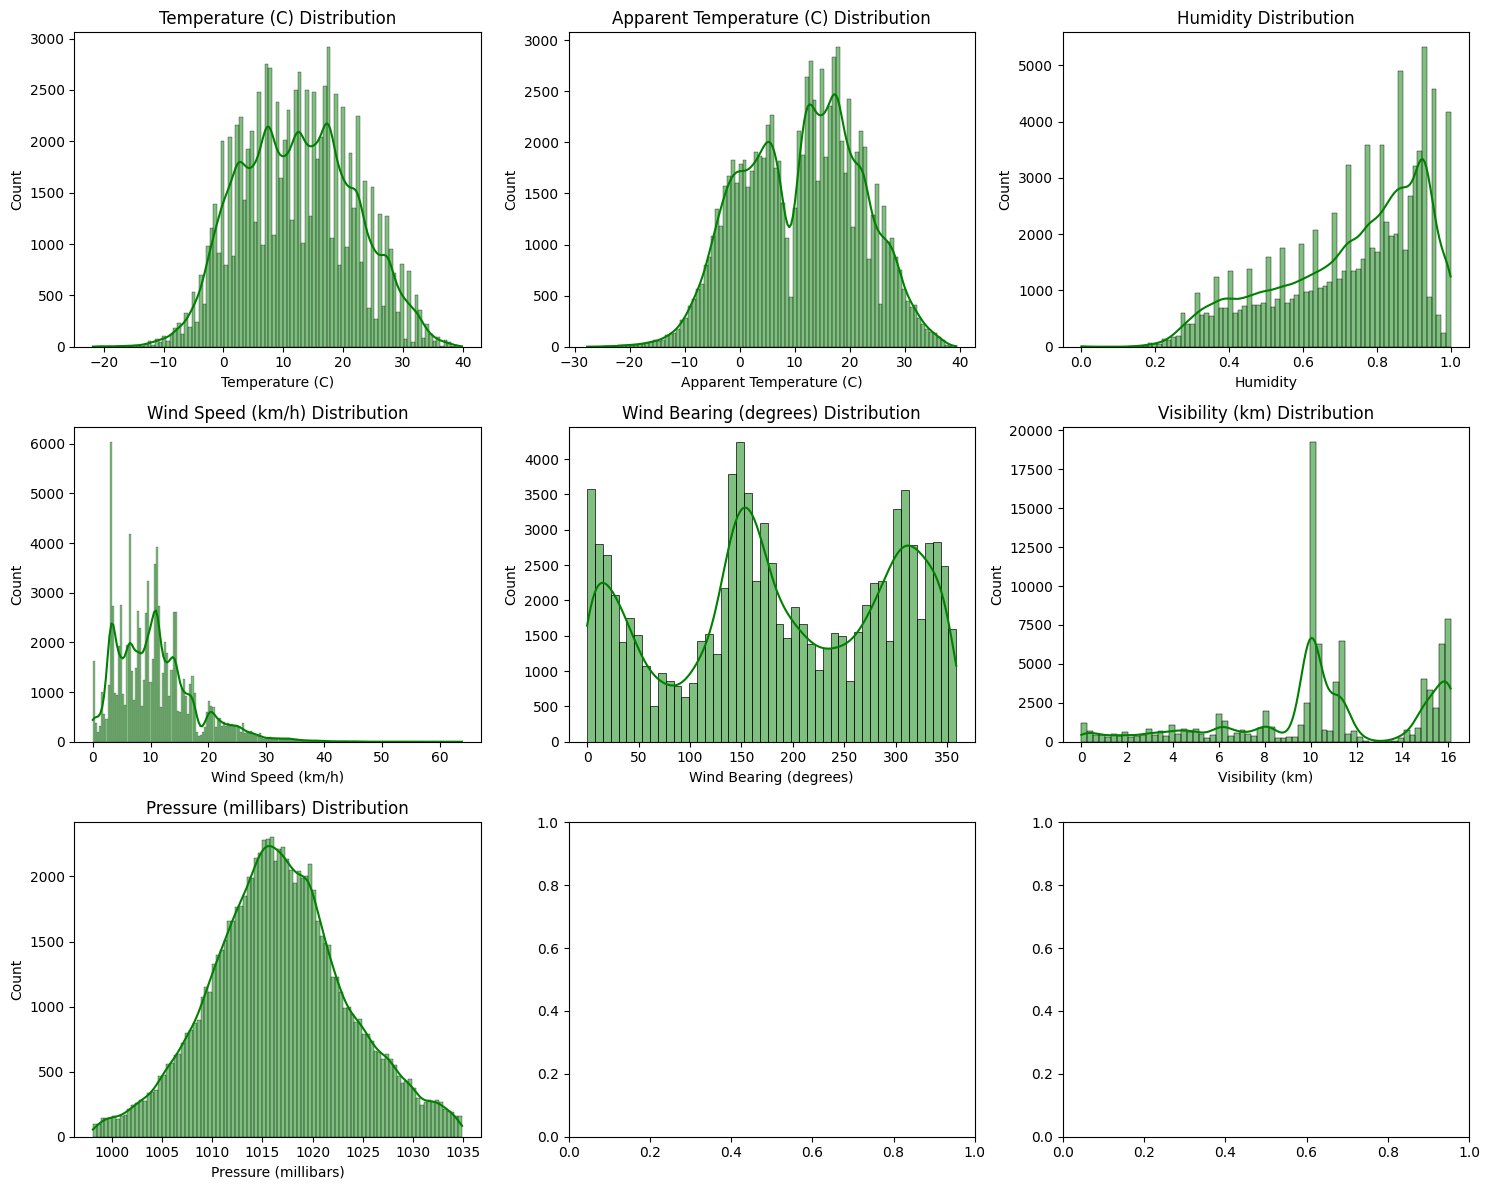

In [228]:
# Find skew value
n = len(num_col)
n_cols = 3
n_rows = (n + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
axes = axes.flatten()

for i, col in enumerate(num_col):
    skew_val = dfc[col].skew()
    print(f"{col} column's skewness value is: {skew_val}")

    # Visual
    sns.histplot(dfc[col], kde=True, color='green', ax=axes[i])
    axes[i].set_title(f"{col} Distribution")
plt.tight_layout()
plt.show()

In [229]:
# Find the skew value
for col in num_col:
  skew_val = dfc[col].skew()
  print(f"{col} column's skewness value is : {skew_val:.3f}")

  # Skewness Type
  if skew_val == 0:
    print(f"{col} column is normally distributed")
  elif skew_val > 0:
    print(f"{col} column is positively skewed")
  else:
    print(f"{col} column is negatively skewed")
  print('*'*60+'\n')

Temperature (C) column's skewness value is : 0.082
Temperature (C) column is positively skewed
************************************************************

Apparent Temperature (C) column's skewness value is : -0.084
Apparent Temperature (C) column is negatively skewed
************************************************************

Humidity column's skewness value is : -0.691
Humidity column is negatively skewed
************************************************************

Wind Speed (km/h) column's skewness value is : 1.101
Wind Speed (km/h) column is positively skewed
************************************************************

Wind Bearing (degrees) column's skewness value is : -0.158
Wind Bearing (degrees) column is negatively skewed
************************************************************

Visibility (km) column's skewness value is : -0.517
Visibility (km) column is negatively skewed
************************************************************

Pressure (millibars) column's sk

In [230]:
# Transformation
# Wind Speed (km/h) column's skewness value is : 1.101 (possitive)
dfc['Wind Speed (km/h)'] = np.sqrt(dfc['Wind Speed (km/h)'])
# Check skew
print('Wind speed (Km/h) skewness',dfc['Wind Speed (km/h)'].skew())

Wind speed (Km/h) skewness -0.035016687243927314


##Uni Variate Visuals

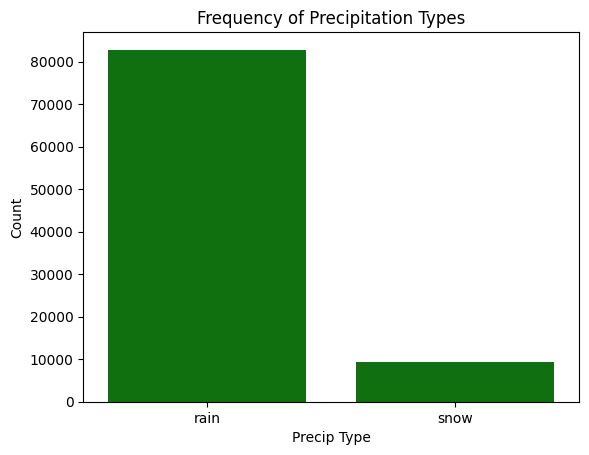

In [231]:
#  Precip Type unique value Count

sns.countplot(data=dfc, x='Precip Type',color = 'green')
plt.title('Frequency of Precipitation Types')
plt.xlabel('Precip Type')
plt.ylabel('Count')
plt.show()

The plot tells us how often each type of precipitation occurred in your dataset.If one bar is taller than the others, it means that precipitation type is more common.

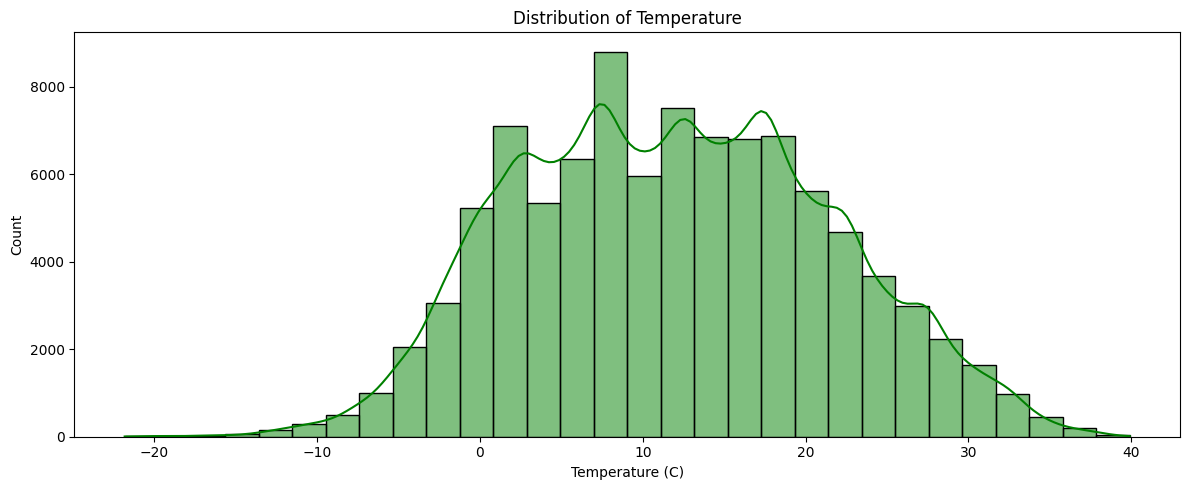

In [232]:
# Histogram (Temperature)

plt.figure(figsize=(12, 5))
sns.histplot(df['Temperature (C)'], kde=True, bins=30, color='green')
plt.title(f"Distribution of {'Temperature'}")
plt.tight_layout()
plt.show()

This plot shows how temperatures are distributed. Most temperatures are clustered around the middle, with a smooth peak near the average. There are fewer very low or very high temperatures, and the shape helps us see how common each temperature range is.

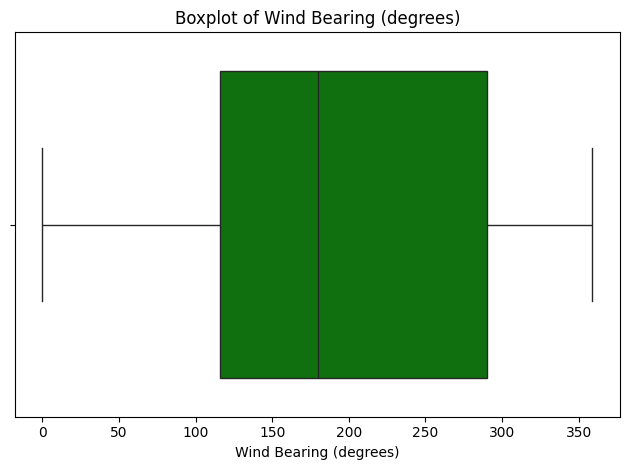

In [233]:
# Boxplot (Wind Bearing (degrees))

sns.boxplot(x=dfc['Wind Bearing (degrees)'], color='green')
plt.title(f"Boxplot of {'Wind Bearing (degrees)'}")
plt.tight_layout()
plt.show()

This boxplot shows the spread of wind bearing values. Most of the data falls within a certain range, with the middle line showing the median direction. Any points outside the whiskers are possible outliers, meaning wind came from less common directions there.

## Bi Variate Visuals

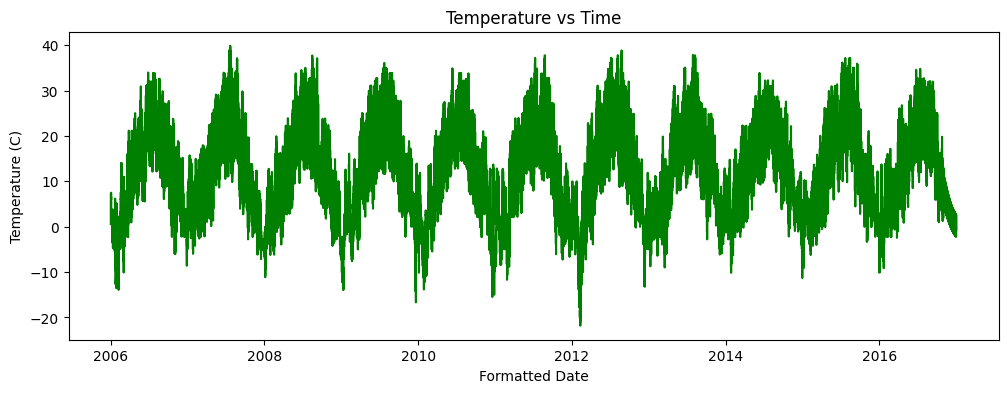

In [234]:
dfc['Formatted Date'] = pd.to_datetime(dfc['Formatted Date'])

# Plot temperature vs time
plt.figure(figsize=(12, 4))
sns.lineplot(x='Formatted Date', y='Temperature (C)', data=dfc, color= 'green')
plt.title('Temperature vs Time')
plt.show()

This line plot shows how temperature changes over time. You can see trends like rising or falling temperatures, and it helps spot patterns such as seasonal shifts or sudden spikes and drops.

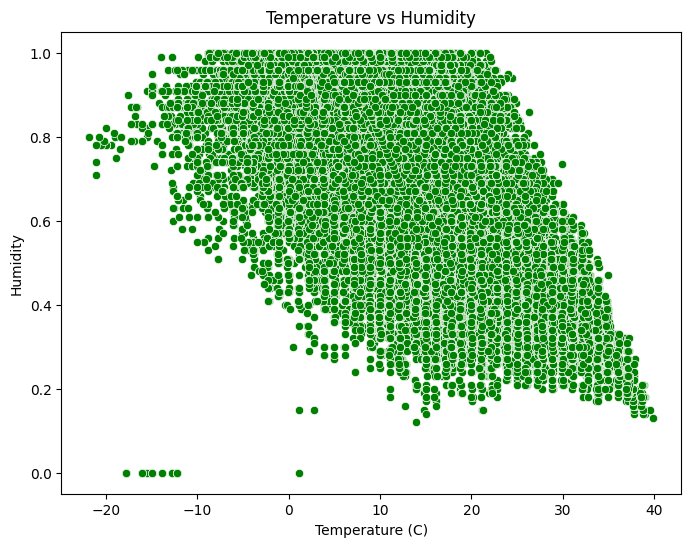

In [235]:
# scatterplot (Temperature vs Humidity)

plt.figure(figsize=(8, 6))
sns.scatterplot(data=dfc, x='Temperature (C)', y='Humidity',  color= 'green')
plt.title('Temperature vs Humidity')
plt.xlabel('Temperature (C)')
plt.ylabel('Humidity')
plt.show()

This scatter plot shows the relationship between temperature and humidity. As temperature increases, humidity generally decreases, showing a possible negative correlation. The points help visualize how closely the two variables are related.

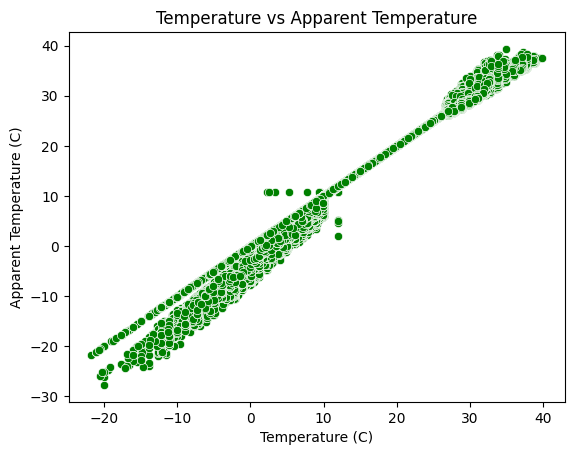

In [236]:
# Scatterplot (Temperature vs Apparent Temperature)

sns.scatterplot(data=dfc, x='Temperature (C)', y='Apparent Temperature (C)',  color= 'green')
plt.title('Temperature vs Apparent Temperature')
plt.xlabel('Temperature (C)')
plt.ylabel('Apparent Temperature (C)')
plt.show()


This scatter plot compares actual temperature to what it feels like (apparent temperature). The points mostly lie along a straight line, showing a strong positive correlation — as temperature rises, the apparent temperature rises too.


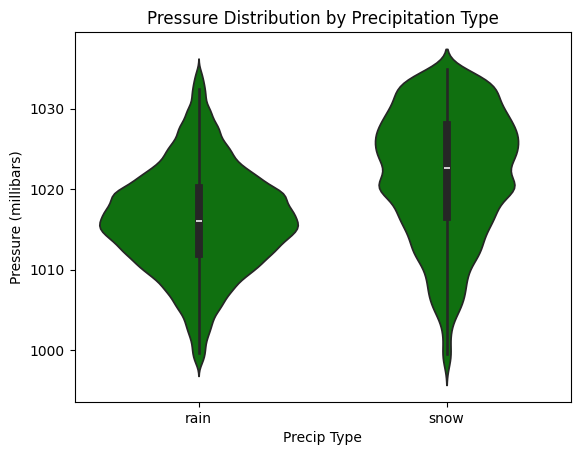

In [237]:
# violinplot Pressure vs Precip Type

sns.violinplot(data=dfc, x='Precip Type', y='Pressure (millibars)', color= 'green')
plt.title('Pressure Distribution by Precipitation Type')
plt.xlabel('Precip Type')
plt.ylabel('Pressure (millibars)')
plt.show()

This violin plot shows how pressure varies with different types of precipitation. The shape and spread of each violin reveal the distribution and range of pressure values for each category, letting us see which precipitation types tend to happen at higher or lower pressures.

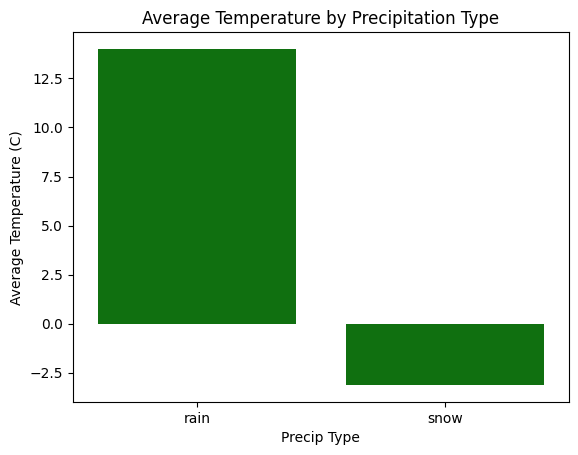

In [238]:
avg_temp = dfc.groupby('Precip Type')['Temperature (C)'].mean().reset_index()

# barplot avrg temperature vs Precip Type

sns.barplot(data=avg_temp, x='Precip Type', y='Temperature (C)', color= 'green')
plt.title('Average Temperature by Precipitation Type')
plt.ylabel('Average Temperature (C)')
plt.xlabel('Precip Type')
plt.show()


This barplot shows the average temperature for each type of precipitation. It helps compare how temperature tends to be different when it’s raining, snowing, or other types of precipitation.

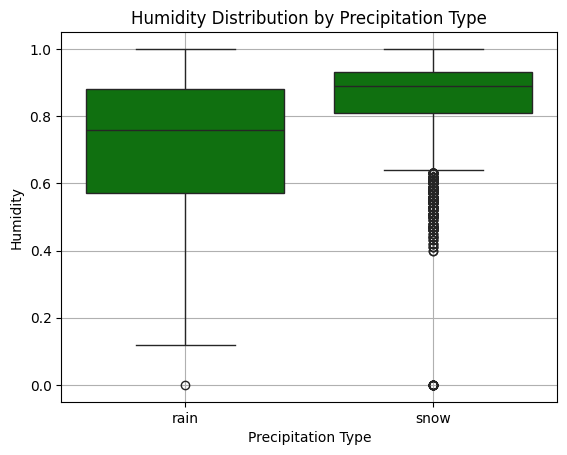

In [239]:
sns.boxplot(x='Precip Type', y='Humidity', data=dfc,  color= 'green')
plt.title('Humidity Distribution by Precipitation Type')
plt.xlabel('Precipitation Type')
plt.ylabel('Humidity')
plt.grid(True)
plt.show()

This plot shows how humidity levels vary with different types of precipitation. It helps us see which precipitation types happen when humidity is generally higher or lower. The spread also shows how much humidity fluctuates for each type.

## Multi Variate Visuals

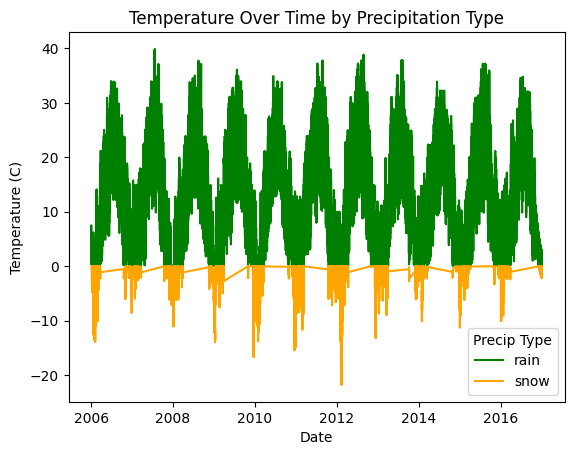

In [240]:
# Line plot (Temperature, Time, Precip Type)

sns.lineplot(data=dfc, x='Formatted Date', y='Temperature (C)', hue='Precip Type',
             palette={'rain': 'green', 'snow': 'orange',})
plt.title('Temperature Over Time by Precipitation Type')
plt.xlabel('Date')
plt.ylabel('Temperature (C)')
plt.show()

This plot shows how temperature changes over time for each type of precipitation. Different colors represent different precipitation types, letting us compare temperature patterns during rain, snow, or other conditions.

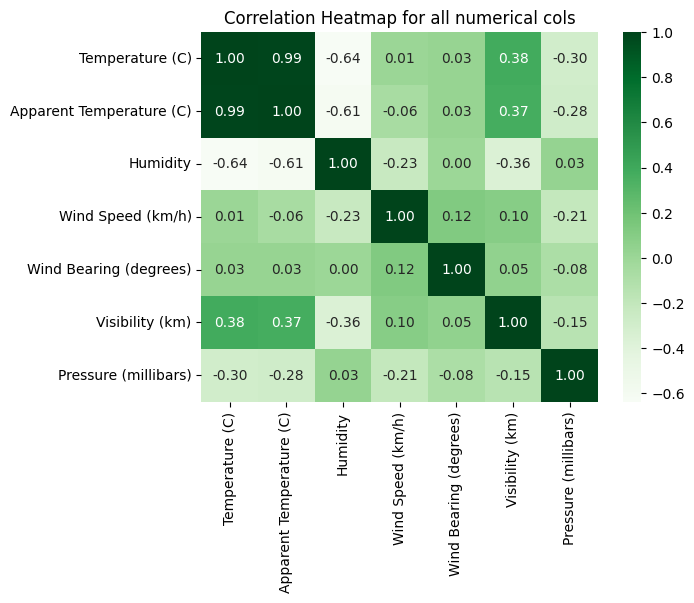

In [241]:
# correlation matrix

numeric_cols = dfc.select_dtypes(include=np.number)
corr = numeric_cols.corr()

# Plot heatmap (All numeric colums)

sns.heatmap(corr, annot=True, cmap='Greens', fmt=".2f")
plt.title('Correlation Heatmap for all numerical cols')
plt.show()

This heatmap shows the correlation between all the numerical columns in the dataset. The colors indicate how strongly variables are related—red means a strong positive correlation, blue means a strong negative one, and lighter colors show weaker relationships. The numbers give the exact correlation values.


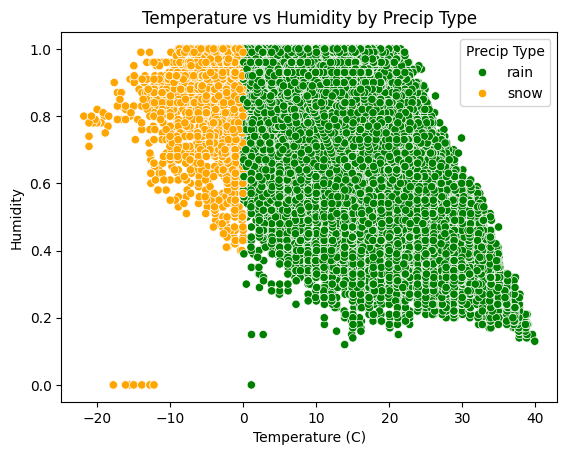

In [242]:
# Temperature vs Humidity by Precip Type

sns.scatterplot(data=dfc, x='Temperature (C)', y='Humidity', hue='Precip Type',
                palette={'rain': 'green', 'snow': 'orange',})
plt.title('Temperature vs Humidity by Precip Type')
plt.show()


This scatter plot shows how temperature and humidity relate, with points colored by precipitation type. It helps us see if different precipitation types tend to occur in certain temperature and humidity conditions.


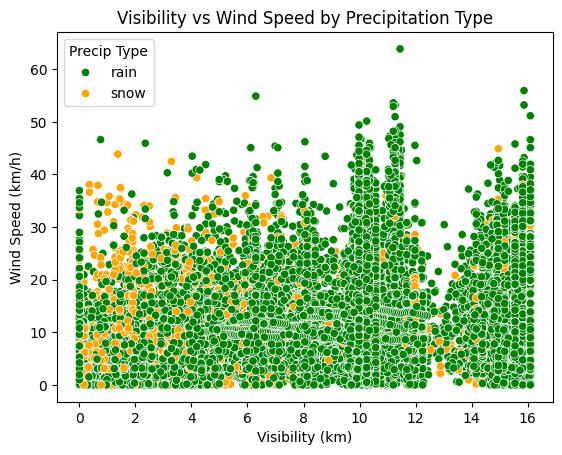

In [243]:
# Scatterplot (Visibility vs Wind Speed by Precip Type)

sns.scatterplot(data=df, x='Visibility (km)', y='Wind Speed (km/h)', hue='Precip Type',
                palette={'rain': 'green', 'snow': 'orange',})
plt.title('Visibility vs Wind Speed by Precipitation Type')
plt.xlabel('Visibility (km)')
plt.ylabel('Wind Speed (km/h)')
plt.show()

This scatter plot shows the relationship between visibility and wind speed, with colors representing different precipitation types. It helps us understand how visibility and wind speed vary during rain, snow, or other precipitation events.


#FEATURE SELECTION & MODEL BUILDING:

## Feature Engineering

In [244]:
#  Lable Encoding

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dfc['Encode Precip Type'] = le.fit_transform(dfc['Precip Type'])

print("0 -> Mostly cloudy throughout the day.\n1 -> rain.\n2 -> snow.")

0 -> Mostly cloudy throughout the day.
1 -> rain.
2 -> snow.


In [245]:
# numerical columns

num_col = dfc.select_dtypes(include=['number']).columns.tolist()
print('Numerical Columns:\n',num_col)

Numerical Columns:
 ['Temperature (C)', 'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)', 'Encode Precip Type']


## Feature Selection

In [246]:
# Data Spliting

from sklearn.feature_selection import SelectKBest, f_classif
X = dfc[['Temperature (C)', 'Apparent Temperature (C)', 'Humidity', 'Wind Bearing (degrees)',
         'Visibility (km)', 'Pressure (millibars)']]
Y = dfc['Encode Precip Type']
selector = SelectKBest (score_func = f_classif, k = 5)
X_new = selector.fit_transform(X, Y)
feature_scores = selector.scores_
print (feature_scores)

[38896.04060204 39990.41558816  5088.90389678   132.06973332
  9432.49399163  6137.59596482]


In [247]:
X.columns[selector.get_support(indices = True)]

Index(['Temperature (C)', 'Apparent Temperature (C)', 'Humidity',
       'Visibility (km)', 'Pressure (millibars)'],
      dtype='object')

In [248]:
selected_cols = pd.DataFrame(X_new , columns = X.columns[selector.get_support(indices = True)])
selected_cols.head(2)

,Temperature (C),Apparent Temperature (C),Humidity,Visibility (km),Pressure (millibars)
0,9.472222,7.388889,0.89,15.8263,1015.13
1,9.355556,7.227778,0.86,15.8263,1015.63


##Feature Scalling

In [249]:
# Feature Scalling

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_std = pd.DataFrame(scaler.fit_transform(selected_cols), columns = selected_cols.columns)
df_std.head(2)

,Temperature (C),Apparent Temperature (C),Humidity,Visibility (km),Pressure (millibars)
0,-0.297688,-0.364265,0.807022,1.291615,-0.226650
1,-0.310041,-0.379485,0.654286,1.291615,-0.153219


## Data Spliting

In [250]:
# Import Data Splitting Libraries
from sklearn.model_selection import train_test_split

x = df_std
y = dfc['Encode Precip Type']

# Data split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# MODEL EVALUATION & COMPARISON

## Model Selection

In [251]:
# pip install xgboost

In [252]:
# Import classifier models

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, f1_score

In [253]:
classifiers = [
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Support Vector Machine', SVC()),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Naive Bayes', GaussianNB()),
    ('XGBoost', XGBClassifier())
]

In [254]:
# Iter through classifiers

result = {}
for name, clf in classifiers:
  clf.fit(x_train, y_train)
  y_pred = clf.predict(x_test)
  # accuracy
  accuracy = accuracy_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)
  # stored result
  result[name] = {'Accuracy': accuracy, 'F1 Score': f1}

In [255]:
result = pd.DataFrame(result).T
result

,Accuracy,F1 Score
Logistic Regression,0.994458,0.972024
Decision Tree,1.000000,1.000000
Random Forest,1.000000,1.000000
Support Vector Machine,0.992285,0.961308
K-Nearest Neighbors,0.989677,0.946927
Naive Bayes,0.943062,0.770075
XGBoost,0.999837,0.999165


All models performed well,But XGBoost offered the best balance of accuracy, generalization, speed. Its handle complex relationships, avoid overfitting through regularization, and scale efficiently made it the most suitable choice for this classification task.

## Model Tuning

In [256]:
# Fit model

model = XGBClassifier(learning_rate	= 0.001, max_depth = 3, n_estimators = 100)
model.fit(x_train, y_train)

acc = model.score(x_test, y_test)
print(f"Accuracy: {acc:.4f}")

Accuracy: 0.9025


## Confusion Matrix & Visual

In [257]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[16608,     3],
       [    0,  1795]])

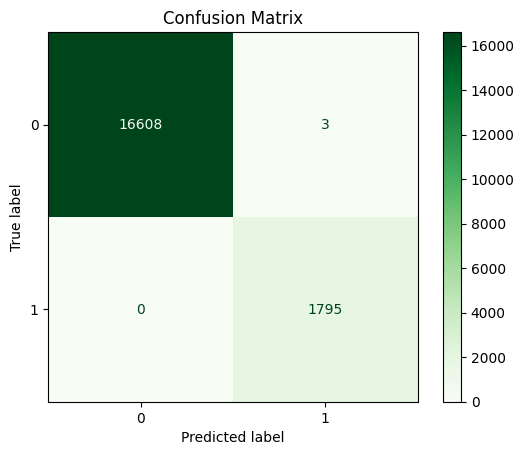

In [258]:
# cm visual

from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(clf, x_test, y_test, cmap='Greens')
plt.title('Confusion Matrix')
plt.show()

##Precision, Clf report, Recall Scores

In [259]:
# precision, clf report, recall scores

from sklearn.metrics import classification_report, precision_score, recall_score

pricision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
clf_report = classification_report(y_test, y_pred)

# print
print(f"Precision: {pricision:.2f}")
print(f"Recall: {recall:.2f}")
print("Classification Report:\n", clf_report)

Precision: 1.00
Recall: 1.00
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     16611
           1       1.00      1.00      1.00      1795

    accuracy                           1.00     18406
   macro avg       1.00      1.00      1.00     18406
weighted avg       1.00      1.00      1.00     18406



## Cross Validation

In [260]:
# K-Fold cross validation

from sklearn.model_selection import KFold,cross_val_score
k = 5
cv = KFold(n_splits=k, shuffle=True, random_state=4)
scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')

print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())

Cross-validation scores: [0.90215147 0.89921765 0.89840269 0.89802238 0.89997283]
Mean accuracy: 0.899553406202689
